# Exploratory Data Analysis

In [101]:
pwd

'C:\\Users\\LENOVO\\Desktop\\Data_Science'

In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read the data set of "Marketing Analysis" in data.
data= pd.read_csv("C:/Users/LENOVO/Desktop/Data_Science/Data_sets/marketing_analysis.csv",low_memory=False)

# Printing the data
data

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19
0,banking marketing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
2,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
3,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
4,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45209,45207,51,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45210,45208,71,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45211,45209,72,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45212,45210,57,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


This is called Fixing the Rows and Columns. Let’s ignore the first two rows and load the data again.

In [103]:
# Read the file in data without first two rows as it is of no use.
data = pd.read_csv("C:/Users/LENOVO/Desktop/Data_Science/Data_sets/marketing_analysis.csv",skiprows = 3,low_memory=False)

data.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


Following are the steps to be taken while Fixing Rows and Columns:

1.Delete Summary Rows and Columns in the Dataset.

2.Delete Header and Footer Rows on every page.

3.Delete Extra Rows like blank rows, page numbers, etc.

4.We can merge different columns if it makes for better understanding of the data

5.Similarly, we can also split one column into multiple columns based on our requirements or understanding.

6.Add Column names, it is very important to have column names to the dataset.

Now if we observe the above dataset, the customerid column has of no importance to our analysis, and also the jobedu column has both the information of job and education in it.

So, what we’ll do is, we’ll drop the customerid column and we’ll split the jobedu column into two other columns job and education and after that, we’ll drop the jobedu column as well

In [104]:
# Drop the customer id as it is of no use.
data.drop('customerid',axis=1,inplace=True)
#Extract job  & Education in newly from "jobedu" column.
data['job']=data['jobedu'].apply(lambda x: x.split(",")[0])
data['education']=data['jobedu'].apply(lambda x: x.split(",")[1])

# Drop the "jobedu" column from the dataframe.
data.drop('jobedu',axis=1,inplace=True)

data

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


In [105]:
data.describe()

,age,salary,balance,day,campaign,pdays,previous
count,45191.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.935651,57006.171065,1362.272058,15.806419,2.763841,40.197828,0.580323
std,10.619198,32085.718415,3044.765829,8.322476,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


# STEPS in EDA

# 1. Variable Identification

Explore each type of variable and identify the predicted and target variable

# 2.Univariate Analysis

If we analyze data over a single variable/column from a dataset, it is known as Univariate Analysis.

Method to perform univariate analysis will depend upon the variable is continous or Categorical

<AxesSubplot:>

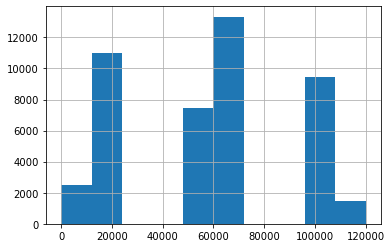

In [106]:
# continous variable
data['salary'].hist(bins=10)    #histogram describe the frequency

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'balance'}>],
       [<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

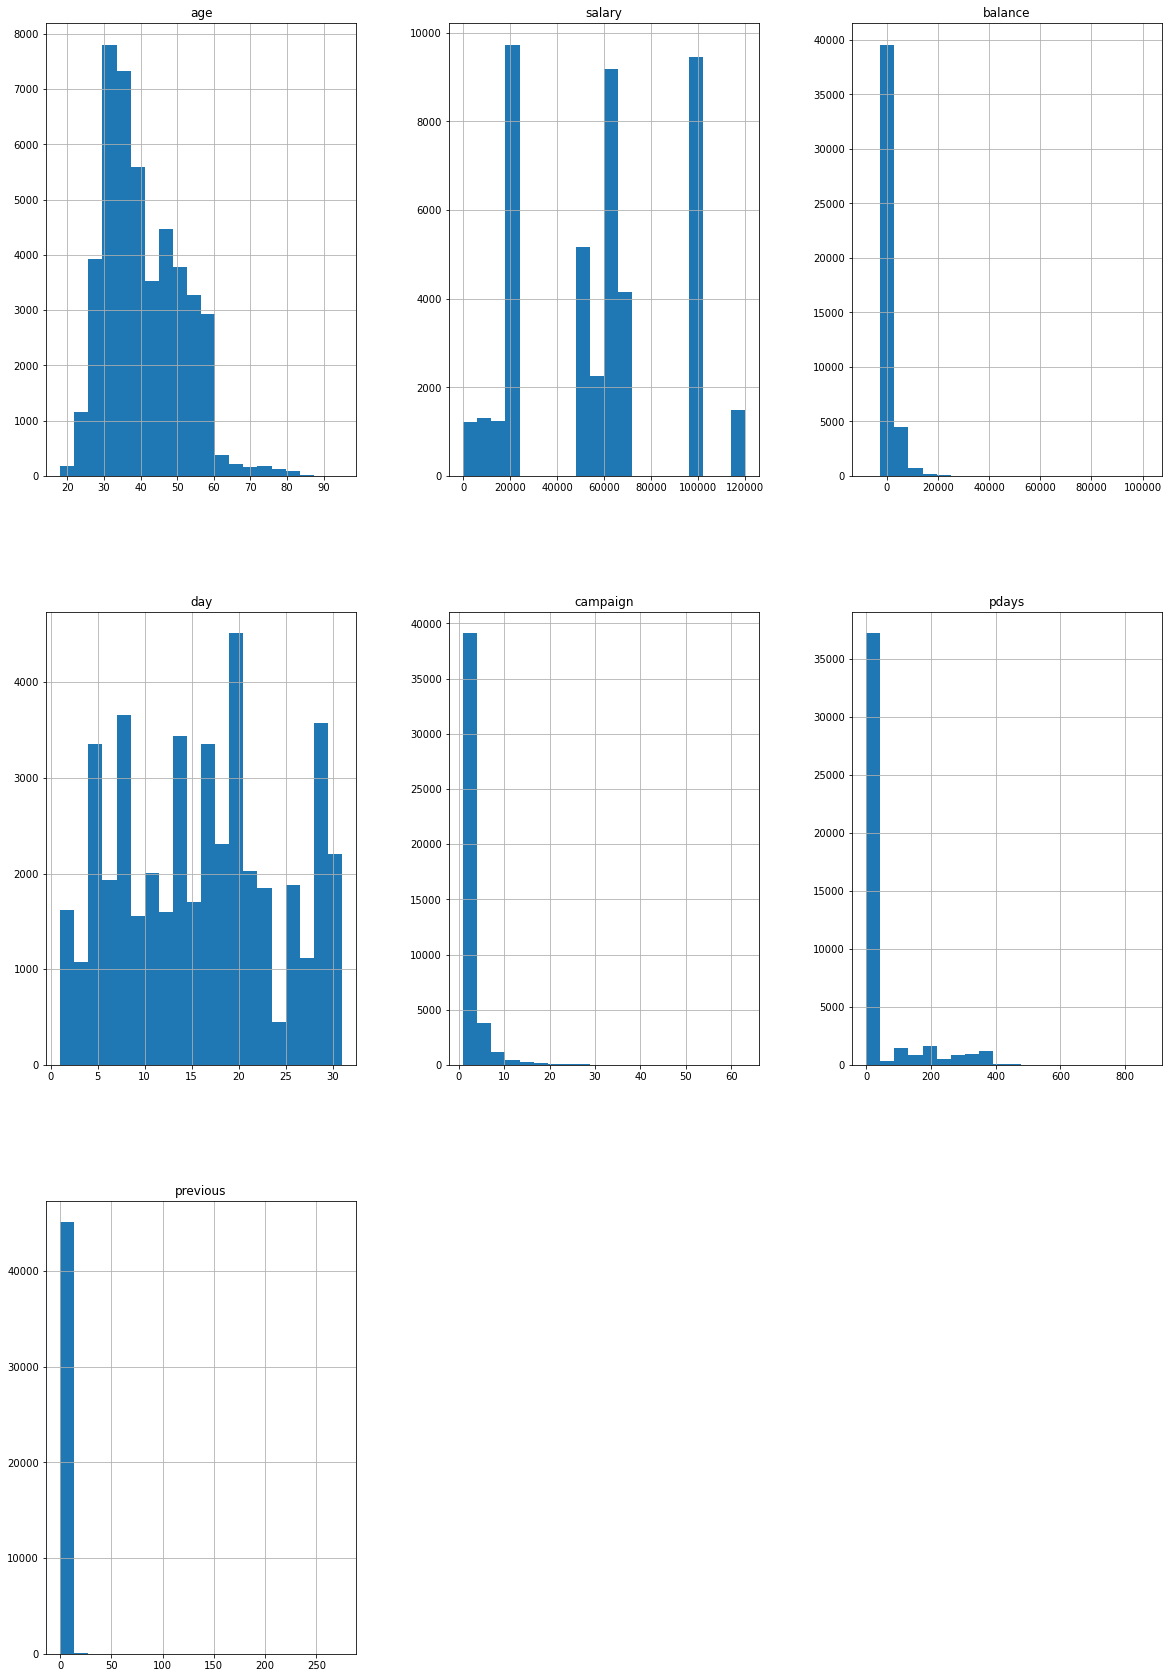

In [107]:
data.hist(bins=20,figsize=(20,30))  

<AxesSubplot:>

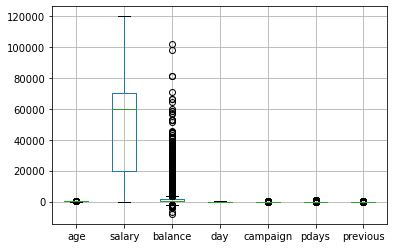

In [108]:
data.boxplot()

<AxesSubplot:>

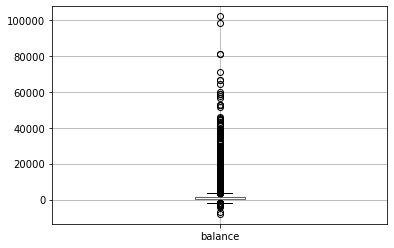

In [109]:
data.boxplot(column='balance')

In [110]:
data.describe()

,age,salary,balance,day,campaign,pdays,previous
count,45191.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.935651,57006.171065,1362.272058,15.806419,2.763841,40.197828,0.580323
std,10.619198,32085.718415,3044.765829,8.322476,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


# Categorical Unordered Univariate Analysis:

An unordered variable is a categorical variable that has no defined order. If we take our data as an example, the job column in the dataset is divided into many sub-categories like technician, blue-collar, services, management, etc. There is no weight or measure given to any value in the ‘job’ column.

Now, let’s analyze the job category by using plots. Since Job is a category, we will plot the bar plot.

In [111]:
data['job'].value_counts()    #frequency of each category

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [112]:
# Let's calculate the percentage of each job status category
data['job'].value_counts(normalize=True)

blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64

<AxesSubplot:>

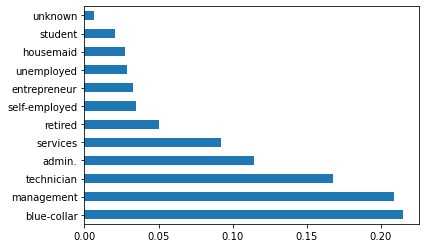

In [113]:
# plot the bar graph of perc job categories
data['job'].value_counts(normalize=True).plot.barh()

# Categorical Ordered Univariate Analysis:

Ordered variables are those variables that have a natural rank of order. Some examples of categorical ordered variables from our dataset are:

-Month: Jan, Feb, March……

-Education: Primary, Secondary,……

Now, let’s analyze the Education Variable from the dataset. Since we’ve already seen a bar plot, let’s see how a Pie Chart looks like.

secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64


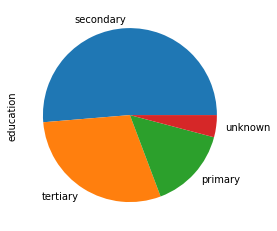

In [114]:
#calculate the percentage of each education category.
print(data.education.value_counts(normalize=True))

#plot the pie chart of education categories
data.education.value_counts(normalize=True).plot.pie()
plt.show()

# STEP 3- Bivariate Analysis

If we analyze data by taking two variables/columns into consideration from a dataset, it is known as Bivariate Analysis

a) Continous and Continous

Analyzing the two numeric variables from a dataset is known as numeric-numeric analysis. We can analyze it in three different ways.

.Scatter Plot

.Pair Plot

.Correlation Matrix

# Scatter Plot

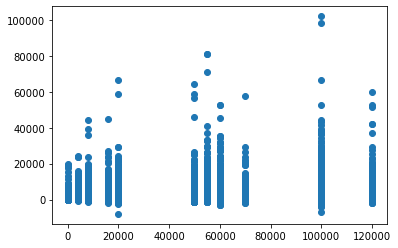

In [115]:
plt.scatter(data.salary,data.balance)

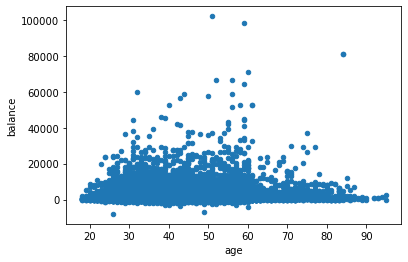

In [116]:
#plot the scatter plot of balance and age variable in data
data.plot.scatter(x="age",y="balance")
plt.show()

# Pair Plot

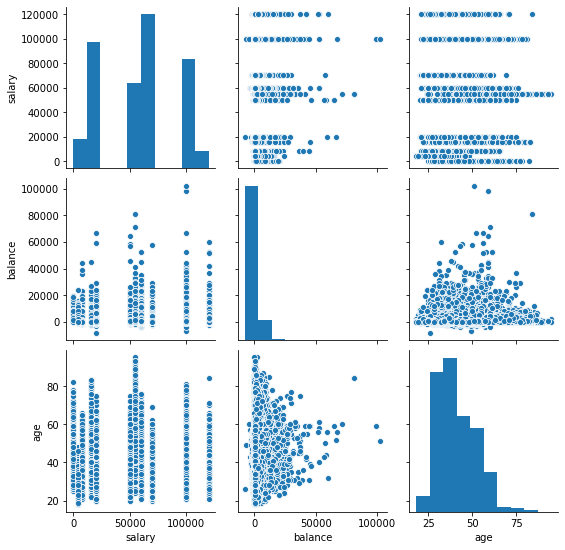

In [117]:
#plot the pair plot of salary, balance and age in data dataframe.
sns.pairplot(data=data,vars=['salary','balance','age'])
plt.show()

# Correlation Matrix


Since we cannot use more than two variables as x-axis and y-axis in Scatter and Pair Plots, it is difficult to see the relation between three numerical variables in a single graph. In those cases, we’ll use the correlation matrix.

In [118]:
# Creating a matrix using age, salry, balance as rows and columns
data[['age','salary','balance']].corr()

,age,salary,balance
age,1.000000,0.024374,0.097755
salary,0.024374,1.000000,0.055469
balance,0.097755,0.055469,1.000000


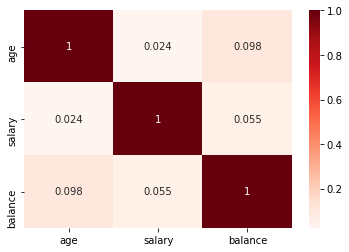

In [119]:
#plot the correlation matrix of salary, balance and age in data dataframe.
sns.heatmap(data[['age','salary','balance']].corr(), annot=True, cmap = 'Reds')
plt.show()

First, we created a matrix using age, salary, and balance. After that, we are plotting the heatmap using the seaborn library of the matrix.

b) Numeric-Categorical Analysis

Analyzing the one numeric variable and one categorical variable from a dataset is known as numeric-categorical analysis. We analyze them mainly using mean, median, and box plots

Let’s take salary and response columns from our dataset.

First check for mean value using groupby

In [120]:
data.head(10)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
5,35.0,100000,231,married,yes,no,yes,no,unknown,5,"may, 2017",139 sec,1,-1,0,unknown,no,management,tertiary
6,28.0,100000,447,single,no,no,yes,yes,unknown,5,"may, 2017",217 sec,1,-1,0,unknown,no,management,tertiary
7,42.0,120000,2,divorced,no,yes,yes,no,unknown,5,"may, 2017",380 sec,1,-1,0,unknown,no,entrepreneur,tertiary
8,58.0,55000,121,married,yes,no,yes,no,unknown,5,"may, 2017",50 sec,1,-1,0,unknown,no,retired,primary
9,43.0,60000,593,single,yes,no,yes,no,unknown,5,"may, 2017",55 sec,1,-1,0,unknown,no,technician,secondary


In [121]:
#groupby the response to find the mean of the salary with response no & yes separately.
data.groupby('response')['salary'].mean()

response
no     56770.917933
yes    58771.704180
Name: salary, dtype: float64

There is not much of a difference between the yes and no response based on the salary.

Let’s calculate the median,

In [122]:
data.groupby('response')['salary'].median()

response
no     60000
yes    60000
Name: salary, dtype: int64

By both mean and median we can say that the response of yes and no remains the same irrespective of the person’s salary. But, is it truly behaving like that, let’s plot the box plot for them and check the behavior

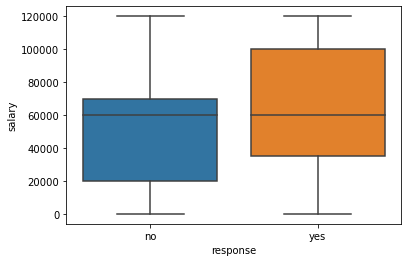

In [123]:
#plot the box plot of salary for yes & no responses.
sns.boxplot(data.response,data.salary)
plt.show()

As we can see, when we plot the Box Plot, it paints a very different picture compared to mean and median. The IQR for customers who gave a positive response is on the higher salary side.

This is how we analyze Numeric-Categorical variables, we use mean, median, and Box Plots to draw some sort of conclusions.

c) Categorical-Categorical Analysis

Since our target variable/column is the Response rate, we’ll see how the different categories like Education, Marital Status, etc., are associated with the Response column. So instead of ‘Yes’ and ‘No’ we will convert them into ‘1’ and ‘0’, by doing that we’ll get the “Response Rate”.

In [124]:
#create response_rate of numerical data type where response "yes"= 1, "no"= 0
data['response_rate'] = np.where(data.response=='yes',1,0)   #creating a new column
data.response_rate.value_counts()

0    39924
1     5287
Name: response_rate, dtype: int64

In [126]:
data.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education,response_rate
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary,0
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary,0
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary,0
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown,0
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown,0


Let’s see how the response rate varies for different categories in marital status.

<AxesSubplot:xlabel='marital'>

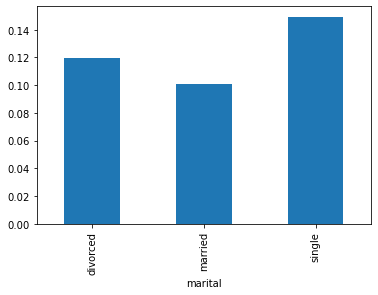

In [130]:
#plot the bar graph of marital status with average value of response_rate
data.groupby('marital')['response_rate'].mean().plot.bar()

# multiivariate Analysis

If we analyze data by taking more than two variables/columns into consideration from a dataset, it is known as Multivariate Analysis.

Let’s see how ‘Education’, ‘Marital’, and ‘Response_rate’ vary with each other.

First, we’ll create a pivot table with the three columns and after that, we’ll create a heatmap.

marital    divorced   married    single
education                              
primary    0.138298  0.075486  0.106682
secondary  0.103375  0.094626  0.129213
tertiary   0.138001  0.129724  0.183431
unknown    0.142012  0.122414  0.162879 
        Pivot Table


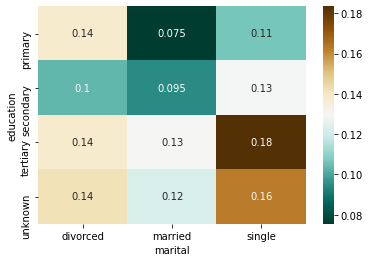

In [142]:
#pivot table give mean of response _rate groupby marial and education
result=pd.pivot_table(data=data,index='education',columns='marital',values='response_rate')
print(result,"\n        Pivot Table")
#create heat map of education vs marital vs response_rate
sns.heatmap(result,annot=True,cmap='BrBG_r')
plt.show()

Based on the Heatmap we can infer that the married people with primary education are less likely to respond positively for the survey and single people with tertiary education are most likely to respond positively to the survey

Similarly, we can plot the graphs for Job vs marital vs response, Education vs poutcome vs response, etc

# Step 4-Missing value treatment

In [145]:
data.isnull().sum()

age              20
salary            0
balance           0
marital           0
targeted          0
default           0
housing           0
loan              0
contact           0
day               0
month            50
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
response         30
job               0
education         0
response_rate     0
dtype: int64

Drop the missing Values

Let’s handle missing values in the age column.

In [146]:
data=data[~data.age.isnull()].copy()     #drop the missing value

In [147]:
data.isnull().sum()

age               0
salary            0
balance           0
marital           0
targeted          0
default           0
housing           0
loan              0
contact           0
day               0
month            50
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
response         30
job               0
education         0
response_rate     0
dtype: int64

Let’s impute values to the missing values for the month column.

Since the month column is of an object type, let’s calculate the mode of that column and impute those values to the missing values.


In [149]:
#find the mode of the month
month_mode=data['month'].mode()[0]
month_mode

'may, 2017'

In [150]:
# fill the missing value with  mode value of month in data.
data.month.fillna(month_mode ,inplace=True)

data.month.isnull().sum()

0

Handling the missing values in the Response column. Since, our target column is Response Column, if we impute the values to this column it’ll affect our analysis. So, it is better to drop the missing values from Response Column.

In [151]:
data=data[~data.response.isnull()].copy()

data.isnull().sum()

age              0
salary           0
balance          0
marital          0
targeted         0
default          0
housing          0
loan             0
contact          0
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome         0
response         0
job              0
education        0
response_rate    0
dtype: int64

We can also, fill the missing values as ‘NaN’ so that while doing any statistical analysis, it won’t affect the outcome.

# Step 5- Handling Outliers

Outliers are the values that are far beyond the next nearest data points.

There are two types of outliers:
    
1.Univariate outliers: Univariate outliers are the data points whose values lie beyond the range of expected values based on one variable.
    
2.Multivariate outliers: While plotting data, some values of one variable may not lie beyond the expected range, but when you plot the data with some other variable, these values may lie far from the expected value.


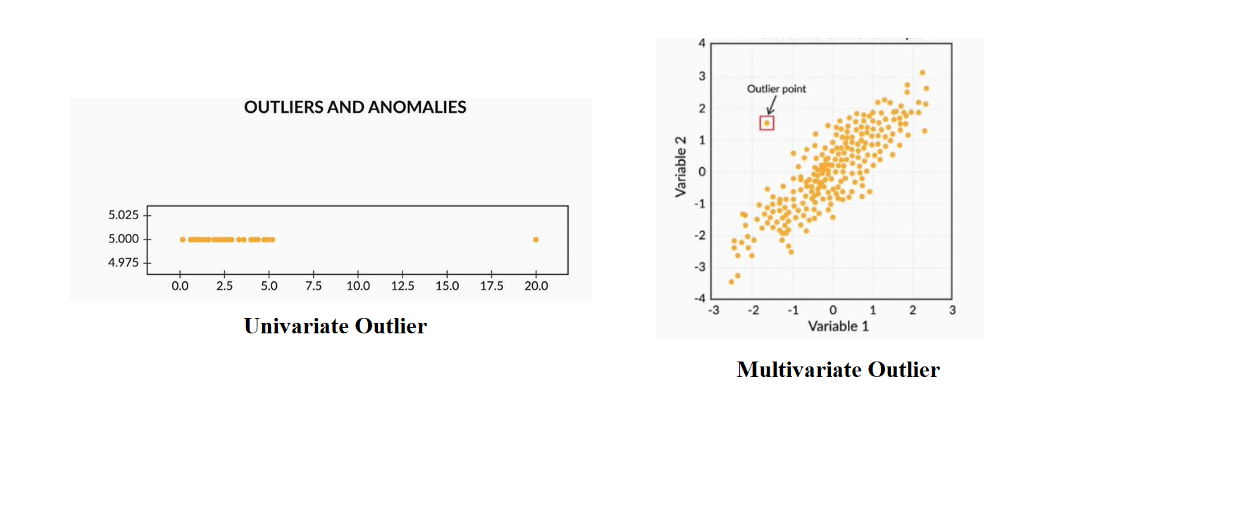

So, after understanding the causes of these outliers, we can handle them by dropping those records or imputing with the values or leaving them as is, if it makes more sense.

In [152]:
data.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education,response_rate
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary,0
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary,0
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary,0
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown,0
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown,0


<AxesSubplot:>

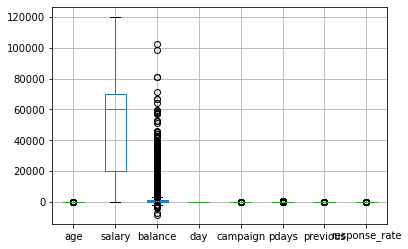

In [154]:
data.boxplot()